## Introduction

Link to the Dataset: <a src="https://www.kaggle.com/c/mercedes-benz-greener-manufacturing">https://www.kaggle.com/c/mercedes-benz-greener-manufacturing</a>

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

<a href="">
    <img src="https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> 
</a>
<h1 align="center"><font size=5 color="DE5538">Mercedez Benz Manufacturing</font></h1>

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas_profiling import ProfileReport

# Set some options 
pd.set_option('display.max_colwidth', 100)
sns.set(style="ticks", color_codes=True)
sns.set_style("whitegrid")

# Set Matplotlib defaults
%matplotlib inline

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rcParams['font.size']=12


# Load data

In [39]:
df = pd.read_csv('train.csv')
print(df.shape)

(4209, 378)


In [11]:
df.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


# Data Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [47]:
df.select_dtypes(include='object').columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [16]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
print(f"Columns having null values : {len(df.columns[df.isna().any()])}")

Columns having null values : 0


In [43]:
def get_zero_var_cols(df):
    zero_var_columns = df.var()
    return zero_var_columns[zero_var_columns == 0].index.to_list()

def drop_zero_var_cols(df, threshold=0):
    columns = get_zero_var_cols(df)
    print(f"Dropping columns : {columns}")
    return df.drop(get_zero_var_cols(df), axis=1)

def get_dtype_col_names(df, include='object'):
    return df.select_dtypes(include=include).columns.to_list()

def get_uniq_label_counts(df):
    object_columns = get_object_col_names(df)
    return list(map(lambda x : (x, len(df[x].unique())), object_columns))

def get_col_top_labels(df, col, top=10):
    index = df[col].value_counts().head(top).index
    return index.to_list()

def top_one_hot(df):
    object_columns = get_dtype_col_names(df)
    one_hot_df = pd.DataFrame()
    for col in object_columns:
        # print(col, ':',  get_col_top_labels(df, col))
        for label in get_col_top_labels(df, col):
            one_hot_col = str(col + '_' + label)
            series = df[col]
            if one_hot_col not in one_hot_df.columns.to_list():
                one_hot_df[one_hot_col] = np.where(series == label, 1, 0)
                
    return one_hot_df

#### View columns having 0 variance

In [4]:
get_zero_var_cols(df)

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

#### View Categorical columns

In [25]:
get_dtype_col_names(df)

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

#### View the unique label counts in the DataFrame

In [60]:
label_counts = get_uniq_label_counts(df)
label_counts

[('X0', 47),
 ('X1', 27),
 ('X2', 44),
 ('X3', 7),
 ('X4', 4),
 ('X5', 29),
 ('X6', 12),
 ('X8', 25)]

In [76]:
df_dummy = df[get_object_col_names(df)]
print(f"Shape of DataFrame before One-Hot encoding : {df_dummy.shape}")
print(f"Shape of DataFrame after One-Hot encoding : {pd.get_dummies(df_dummy).shape}")

Shape of DataFrame before One-Hot encoding : (4209, 8)
Shape of DataFrame after One-Hot encoding : (4209, 195)


#### Take only top 10 labels

In [5]:
get_col_top_labels(df, 'X3')

['c', 'f', 'a', 'd', 'g', 'e', 'b']

In [49]:
numerical_columns = [col for col in get_dtype_col_names(df,'int64') if col.startswith('X')]

In [51]:
profile = ProfileReport(df[numerical_columns], title="Pandas Profiling Report")
# profile.to_notebook_iframe()
profile.to_widgets()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Summarize dataset:   0%|          | 0/381 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
df[numerical_columns].hist(bins=50, figsize=(20,15))
plt.show()

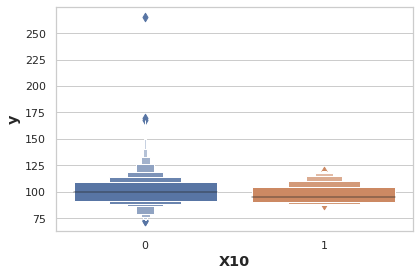

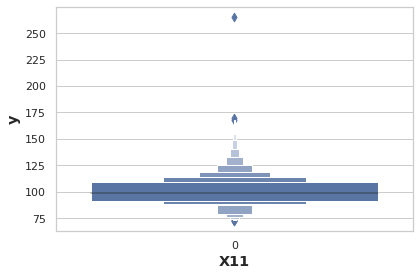

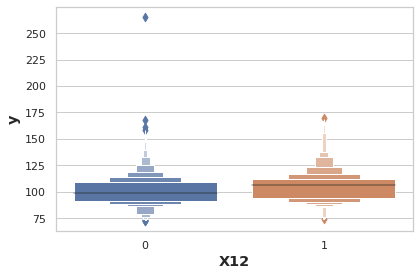

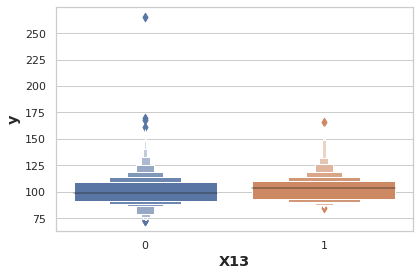

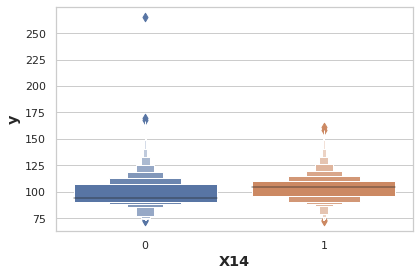

In [27]:
for col in numerical_columns[:5] :
    sns.boxenplot(x=col, y='y', data=df)
    plt.show()

# Preprocessing

In [ ]:
class TopOneHotEncoder(BaseEstimator, TransformMixin):
    def __in

In [46]:
# Take categorical columns
object_columns = get_dtype_col_names(df)
numerical_columns = get_dtype_col_names(df, include='int64')
# Convert categorical columns to numerical using one hot encoding
df_one_hot = top_one_hot(df)
df_train = pd.concat([df, df_one_hot], axis=1)

# List of columns to drop
drop_columns = get_zero_var_cols(df) # 0 Variance columne
drop_columns.append('ID')            # id column
drop_columns += object_columns       # categorical columns
# Drop all columns with 0 variance
# df_train = drop_zero_var_cols(df)
# df_train.head(3)
df_train.drop(drop_columns, axis=1, inplace=True)
df_train.head(4)

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_j,X8_s,X8_f,X8_n,X8_i,X8_e,X8_r,X8_a,X8_w,X8_v
0,130.81,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
drop_columns

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347',
 'id',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X8']

In [167]:
df_train['X1'].head(3)

KeyError: 'X1'

In [6]:
y = np.array([8,8,5,7,9,8,7,4,8])
x = np.arange(len(y))
x,y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([8, 8, 5, 7, 9, 8, 7, 4, 8]))

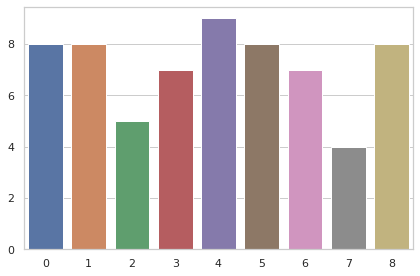

In [36]:
sns.barplot(x, y)

In [37]:
stack, count = [], 1
for i, value in enumerate(y):
    print(i)

[8 8 5 7 9 8 7 4 8]
[8 8 5 7 9 8 7 4 8]
[8 8 5 7 9 8 7 4 8]
[8 8 5 7 9 8 7 4 8]
[8 8 5 7 9 8 7 4 8]
[8 8 5 7 9 8 7 4 8]
[8 8 5 7 9 8 7 4 8]
[8 8 5 7 9 8 7 4 8]
[8 8 5 7 9 8 7 4 8]
